In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Generación de ruido 

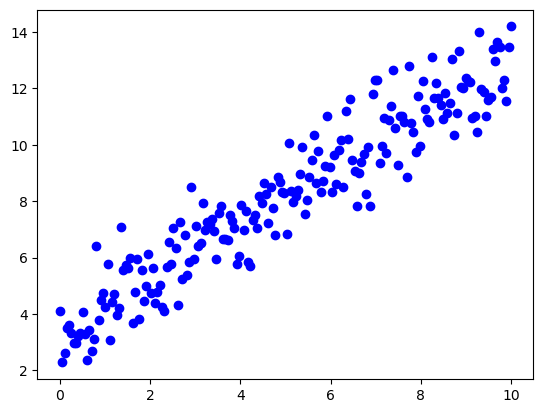

In [4]:
# y = 1*x + 3
# y = a*x + b
# 0 < x < 10
a = 1   # Representa la inclinación de la línea, cuanto más grande sea el valor más inclinación tendrá.
b = 3   # Representa la altura en la que comienza la línea.
lx = np.linspace(0, 10, 200)
ly = a*lx + b
ruido = np.random.randn(200)    # Me genera la cantidad de números aleatorios que le propongo .
ly = ly + ruido


# plt.plot(lx, ly, color = 'b') # Para que una todos los puntos con una línea.
plt.scatter(lx, ly, color = 'b') # Para pintar los puntos en el gráfico.


# ESTOS SON LOS PUNTOS DE DONDE PARTIMOS, REPRESENTANDO EL PESO CORPORAL (Y) Y LA ALTURA (X) DE CADA PERSONA

### Añadimos valores a las variables 'a' y 'b'

In [5]:
a = 10
b = 10

### Funciones auxiliares

In [6]:
def predice(x):
    y_hat = a*x + b # Calcula las Ys que le corresponde a cada X.
    return y_hat

# Función que calcula el error de cada punto nuevo hecho
# Se pasan las 'x' y las y reales 'y' devuelve el array de errores de cada 'x'
def error(x, y):
    y_hat = predice(x)
    err = y_hat - y
    return err

# Se le pasan las 'x' y las 'y' reales y devuelve el coste cuadrático medio
# 1/(2n) * ∑(yi_hat - yi)²
def coste(x, y):
    err = error(x,y)
    c = err**2
    c = c.mean()
    c = c/2
    return c

**MSE (Error Medio Cuadrático)** -> Métrica de error cuando queremos predecir un número real. [ Promedio de los errores al cuadrado ] Lo representamos en la función 'coste'

### Realización de pruebas 

pru_x  [0.50251256 2.51256281 5.02512563]
pru_y  [4.06376674 7.0354862  6.84823456]
estimados por el modelo  [ 4.40825189  7.34520074 10.28214959]
error  [ 0.6396559  -1.15138061  0.51172472]
coste  0.3327831955734129


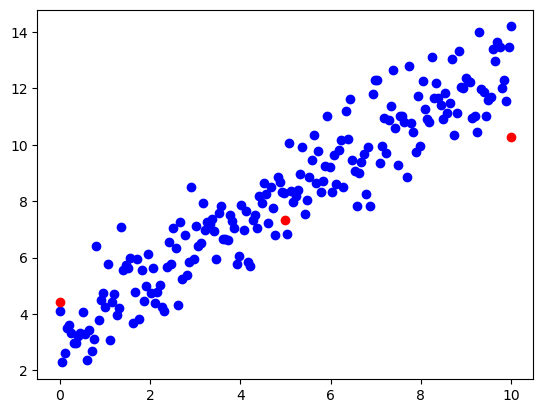

In [128]:
plt.scatter(lx, ly, color = 'b')
pru_x = np.array([lx[10], lx[50], lx[100]])
pru_y = np.array([ly[10], ly[50], ly[100]])

y_hat = predice(np.array([0,5,10]))
plt.scatter([0, 5, 10], y_hat, color="r")
le = error(pru_x, pru_y )
c = coste(pru_x, pru_y)
print("pru_x ", pru_x)
print("pru_y ", pru_y)
print("estimados por el modelo ", y_hat)
print("error ", le)
print("coste ", c)

Se aplicará el descenso del gradiente
x -> x - lr X df(x)/dx

Según la regla de la cadena se multiplican las siguientes derivadas para sacar la derivada general del descenso del gradiente al haber 2 variables en lugar de 1.

In [12]:
#1/n ∑(yi_hat -yi)*xi
def deriva_coste_respecto_a(x,y):
    err = error(x,y)
    d = err*x
    d = d.mean()
    return d

#1/n ∑(yi_hat -yi) = err
def deriva_coste_respecto_b(x,y):
    d = error(x,y)
    d = d.mean()
    return d

In [9]:
pru_x = np.array([lx[10], lx[50], lx[100]])
pru_y = np.array([ly[10], ly[50], ly[100]])
lr = 0.1

In [127]:
for _ in range(10):
    
    # DERIVADAS RESPECTO A CADA VARIABLE
    da = deriva_coste_respecto_a(pru_x, pru_y)
    db = deriva_coste_respecto_b(pru_x, pru_y)

    # DESCENSO DEL GRADIENTE
    a = a - lr*da
    b = b - lr*db

    loss = coste(pru_x, pru_y)

    print(f"a: {a} b: {b} loss: {loss}")

a: 0.5873897696107981 b: 4.408251894382934 loss: 0.3327831955734129
a: 0.5873897696107981 b: 4.408251894382934 loss: 0.3327831955734129
a: 0.5873897696107981 b: 4.408251894382934 loss: 0.3327831955734129
a: 0.5873897696107981 b: 4.408251894382934 loss: 0.3327831955734129
a: 0.5873897696107981 b: 4.408251894382934 loss: 0.3327831955734129
a: 0.5873897696107981 b: 4.408251894382934 loss: 0.3327831955734129
a: 0.5873897696107981 b: 4.408251894382934 loss: 0.3327831955734129
a: 0.5873897696107981 b: 4.408251894382934 loss: 0.3327831955734129
a: 0.5873897696107981 b: 4.408251894382934 loss: 0.3327831955734129
a: 0.5873897696107981 b: 4.408251894382934 loss: 0.3327831955734129
